In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


/cvmfs/sphenix.sdcc.bnl.gov/alma9.2-gcc-14.2.0/opt/sphenix/core/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024/run_by_run_syst

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024/run_by_run_syst


In [4]:
direct = 'spring_2025/detdeta_run24_plots/run_by_run_QA_plots'

In [263]:
#runs = ['23727','23735','23737','23738','23739','23740','23743','23745']
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
centlength = {'0-5':0,'5-10':5,'10-20':10,'20-30':20,'30-40':30,'40-50':40,'50-60':50}
cent = cents[6]
files = ["dETdeta_analysis_allruns_ana450_2024p009_54911_nozs_data_noweight_"+cent+".root", 
         "../fixed_build/dETdeta_analysis_allruns_ana450_2024p009_100_50_50_ZS_hcal_tsc_emcal_calib_iter15_nozs_data_noweight_"+cent+".root",
         "dETdeta_analysis_allruns_ana450_2024p009_54914_nozs_data_noweight_"+cent+".root"]
leg_labels = ["run 54911","run 54912","run 54914"]

h_vz = []  
h_vz_reweight = [] 
h_mbd = [] 
h_event_truth_energy = []  
hetdeta = []   
hetdeta_zoom = []  
h_2D_ihcal_calib = []  
h_2D_ohcal_calib = []  
h_2D_emcal_calib = []  
h_2D_ihcal_calibT = [] 
h_2D_ohcal_calibT = [] 
h_2D_emcal_calibT = [] 
h_event_energy = []    
h_event_hcal_energy = []   
h_event_emcal_energy = []  
h_event_ihcal_energy = []  
h_event_ohcal_energy = []  
h_emcal = []   
h_ihcal = []   
h_ohcal = []    
hetdeta_emcalbin = []  
h_eT_eta_emcal = []      
hetdeta_ihcalbin = []  
h_eT_eta_ihcal = []    
hetdeta_ohcalbin = []  
h_eT_eta_ohcal = []    
hetdeta_calobin = []   
h_eT_eta_calo = [] 
h_emcal_correction = []    
h_ihcal_correction = []    
h_ohcal_correction = []    
h_calo_correction = []
h_central = []

for i, file in enumerate(files):
    f1 = ROOT.TFile.Open(file)
    h_vz.append(TH1F(f1.Get("h_vz")))
    h_vz_reweight.append(TH1F(f1.Get("h_vz_reweight")))
    h_mbd.append(TH1F(f1.Get("h_mbd")))
    #h_central.append(TH1F(f1.Get("h_cent")))
    h_event_truth_energy.append(TH1F(f1.Get("h_cent")))
    hetdeta.append(TH1F(f1.Get("hetdeta")))
    hetdeta_zoom.append(TH1F(f1.Get("hetdeta_zoom")))
    h_2D_ihcal_calib.append(TH2F(f1.Get("h_2D_ihcal_calib")))
    h_2D_ohcal_calib.append(TH2F(f1.Get("h_2D_ohcal_calib")))
    h_2D_emcal_calib.append(TH2F(f1.Get("h_2D_emcal_calib")))
    h_2D_ihcal_calibT.append(TH2F(f1.Get("h_2D_ihcal_calibT")))
    h_2D_ohcal_calibT.append(TH2F(f1.Get("h_2D_ohcal_calibT")))
    h_2D_emcal_calibT.append(TH2F(f1.Get("h_2D_emcal_calibT")))
    h_event_energy.append(TH1F(f1.Get("h_event_energy")))
    h_event_hcal_energy.append(TH1F(f1.Get("h_event_hcal_energy")))
    h_event_emcal_energy.append(TH1F(f1.Get("h_event_emcal_energy")))
    h_event_ihcal_energy.append(TH1F(f1.Get("h_event_ihcal_energy")))
    h_event_ohcal_energy.append(TH1F(f1.Get("h_event_ohcal_energy")))
    h_emcal.append(TH1F(f1.Get("h_emcal")))
    h_ihcal.append(TH1F(f1.Get("h_ihcal")))
    h_ohcal.append(TH1F(f1.Get("h_ohcal")))
    hetdeta_emcalbin.append(TH1F(f1.Get("hetdeta_emcalbin")))
    h_eT_eta_emcal.append(TH1F(f1.Get("h_eT_eta_emcal_profile_hist")))
    hetdeta_ihcalbin.append(TH1F(f1.Get("hetdeta_ihcalbin")))
    h_eT_eta_ihcal.append(TH1F(f1.Get("h_eT_eta_ihcal_profile_hist")))
    hetdeta_ohcalbin.append(TH1F(f1.Get("hetdeta_ohcalbin")))
    h_eT_eta_ohcal.append(TH1F(f1.Get("h_eT_eta_ohcal_profile_hist")))
    hetdeta_calobin.append(TH1F(f1.Get("hetdeta_calobin")))
    h_eT_eta_calo.append(TH1F(f1.Get("h_eT_eta_calo_profile_hist")))
    h_vz[i].Scale(1.0/h_vz[i].Integral())
    h_vz_reweight[i].Scale(1.0/h_vz_reweight[i].Integral())
    h_mbd[i].Rebin(5)
    h_mbd[i].Scale(1.0/h_mbd[i].Integral())
    h_event_truth_energy[i].Scale(1.0/h_event_truth_energy[i].GetEntries())
    h_event_energy[i].Rebin(10)
    h_event_energy[i].Scale(1.0/h_event_energy[i].Integral())
    h_event_hcal_energy[i].Rebin(5)
    h_event_hcal_energy[i].Scale(1.0/h_event_hcal_energy[i].Integral())
    h_event_emcal_energy[i].Rebin(10)
    h_event_emcal_energy[i].Scale(1.0/h_event_emcal_energy[i].Integral())
    h_event_ihcal_energy[i].Rebin(2)
    h_event_ihcal_energy[i].Scale(1.0/h_event_ihcal_energy[i].Integral())
    h_event_ohcal_energy[i].Rebin(5)
    h_event_ohcal_energy[i].Scale(1.0/h_event_ohcal_energy[i].Integral())
    h_emcal[i].Rebin(10)
    h_emcal[i].Scale(1.0/h_emcal[i].Integral())
    h_ihcal[i].Rebin(10)
    h_ihcal[i].Scale(1.0/h_ihcal[i].Integral())
    h_ohcal[i].Rebin(10)
    h_ohcal[i].Scale(1.0/h_ohcal[i].Integral())
    h_vz[i].SetDirectory(0)
    h_vz_reweight[i].SetDirectory(0)
    h_mbd[i].SetDirectory(0)
    h_event_truth_energy[i].SetDirectory(0)
    hetdeta[i].SetDirectory(0)
    hetdeta_zoom[i].SetDirectory(0)
    h_2D_ihcal_calib[i].SetDirectory(0)
    h_2D_ohcal_calib[i].SetDirectory(0)
    h_2D_emcal_calib[i].SetDirectory(0)
    h_2D_ihcal_calibT[i].SetDirectory(0)
    h_2D_ohcal_calibT[i].SetDirectory(0)
    h_2D_emcal_calibT[i].SetDirectory(0)
    h_event_energy[i].SetDirectory(0)
    h_event_hcal_energy[i].SetDirectory(0)
    h_event_emcal_energy[i].SetDirectory(0)
    h_event_ihcal_energy[i].SetDirectory(0)
    h_event_ohcal_energy[i].SetDirectory(0)
    h_emcal[i].SetDirectory(0)
    h_ihcal[i].SetDirectory(0)
    h_ohcal[i].SetDirectory(0)
    hetdeta_emcalbin[i].SetDirectory(0)
    h_eT_eta_emcal[i].SetDirectory(0)
    hetdeta_ihcalbin[i].SetDirectory(0)
    h_eT_eta_ihcal[i].SetDirectory(0)
    hetdeta_ohcalbin[i].SetDirectory(0)
    h_eT_eta_ohcal[i].SetDirectory(0)
    hetdeta_calobin[i].SetDirectory(0)
    h_eT_eta_calo[i].SetDirectory(0)

## Event level plots: h_vz, h_vz_reweight, h_mbd, h_event_truth_energy, hetdeta

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/vz_50-60.png has been created


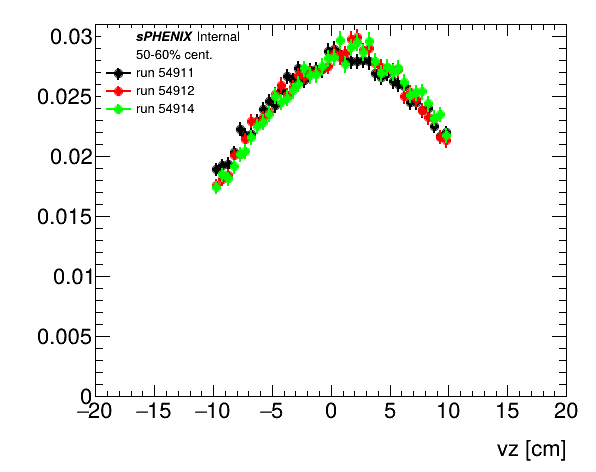

In [264]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.17,.75,.4,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_vz)):
    leg.AddEntry(h_vz[i],leg_labels[i],"lep")
    h_vz[i].SetLineColor(i+1)
    h_vz[i].SetMarkerColor(i+1)
    h_vz[i].SetStats(0)
    if i == 0:
        h_vz[i].SetXTitle("vz [cm]")
        h_vz[i].GetXaxis().SetRangeUser(-20,20)
        h_vz[i].Draw()
    else:
        h_vz[i].Draw("same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/vz_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/vz_reweight_50-60.png has been created


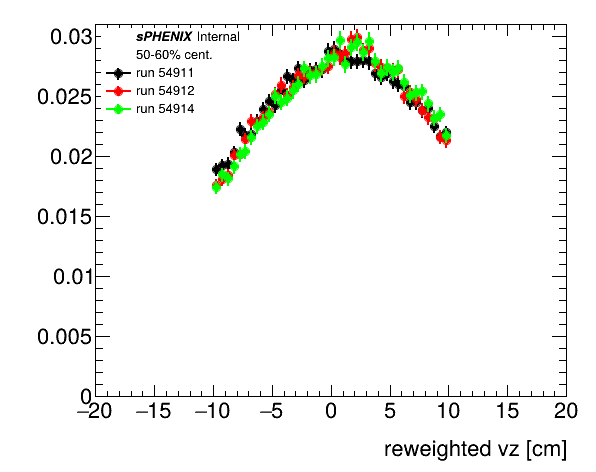

In [265]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.17,.75,.4,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_vz_reweight)):
    leg.AddEntry(h_vz_reweight[i],leg_labels[i],"lep")
    h_vz_reweight[i].SetLineColor(i+1)
    h_vz_reweight[i].SetMarkerColor(i+1)
    h_vz_reweight[i].SetStats(0)
    if i == 0:
        h_vz_reweight[i].SetXTitle("reweighted vz [cm]")
        h_vz_reweight[i].GetXaxis().SetRangeUser(-20,20)
        h_vz_reweight[i].Draw()
    else:
        h_vz_reweight[i].Draw("same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/vz_reweight_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/mbd_50-60.png has been created


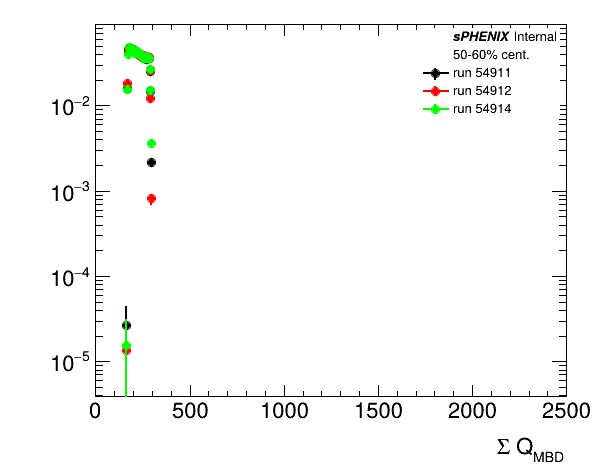

In [266]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_mbd)):
    leg.AddEntry(h_mbd[i],leg_labels[i],"lep")
    h_mbd[i].SetLineColor(i+1)
    h_mbd[i].SetMarkerColor(i+1)
    h_mbd[i].SetStats(0)
    if i == 0:
        h_mbd[i].SetXTitle("#Sigma Q_{MBD}")
        h_mbd[i].GetXaxis().SetRangeUser(0,2500)
        h_mbd[i].Draw()
    else:
        h_mbd[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/mbd_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/centrality_50-60.png has been created


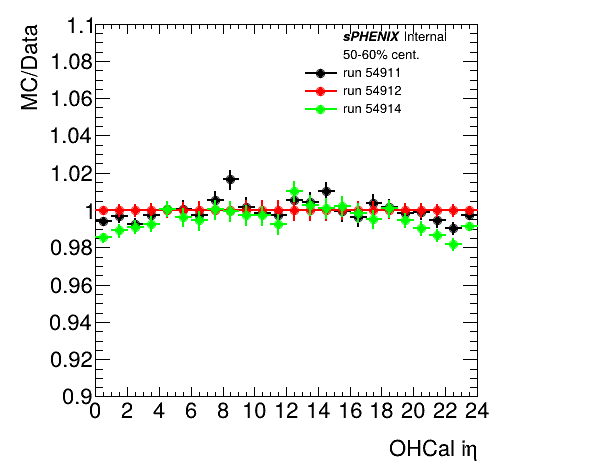

In [267]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.2,.94,.4)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_event_truth_energy)):
    leg.AddEntry(h_event_truth_energy[i],leg_labels[i],"lep")
    h_event_truth_energy[i].SetLineColor(i+1)
    h_event_truth_energy[i].SetMarkerColor(i+1)
    h_event_truth_energy[i].SetStats(0)
    if i == 0:
        h_event_truth_energy[i].SetXTitle("Cent (%)")
        h_event_truth_energy[i].GetXaxis().SetRangeUser(centlength[cent],centlength[cent]+10)
        h_event_truth_energy[i].Draw()
    else:
        h_event_truth_energy[i].Draw("same")
leg.Draw()
canvas.SetLogy(0)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/centrality_'+cent+'.png')

## 2D Calorimeter plots: h_2D_ihcal_calib, h_2D_ohcal_calib, h_2D_emcal_calib, h_2D_ihcal_calibT, h_2D_ohcal_calibT, h_2D_emcal_calibT

In [268]:
#Confirm hot maps
hot_maps = []
for i in range(len(h_2D_emcal_calib)):
    hot_map = []
    for j in range(1, h_2D_emcal_calib[i].GetNbinsX() + 1):
        for k in range(1, h_2D_emcal_calib[i].GetNbinsY() + 1):
            if (h_2D_emcal_calib[i].GetBinContent(j,k) == 0):
                hot_map.append((j-1,k-1))
    hot_maps.append((hot_map))
print("EMCal hot towers:",len(hot_maps[0]))  

for i in range(len(hot_maps[0])):
    if hot_maps[0][i][0] != hot_maps[1][i][0] or hot_maps[0][i][1] != hot_maps[1][i][1]:
        print("EMCal hot tower mismatch:",hot_maps[0][i], hot_maps[1][i])
        
hot_maps = []
for i in range(len(h_2D_ihcal_calib)):
    hot_map = []
    for j in range(1, h_2D_ihcal_calib[i].GetNbinsX() + 1):
        for k in range(1, h_2D_ihcal_calib[i].GetNbinsY() + 1):
            if (h_2D_ihcal_calib[i].GetBinContent(j,k) == 0):
                hot_map.append((j-1,k-1))
    hot_maps.append((hot_map))
print("IHCal hot towers:",len(hot_maps[0]))  

for i in range(len(hot_maps[0])):
    if hot_maps[0][i][0] != hot_maps[1][i][0] or hot_maps[0][i][1] != hot_maps[1][i][1]:
        print("IHCal hot tower mismatch:",hot_maps[0][i], hot_maps[1][i])
        
hot_maps = []
for i in range(len(h_2D_ohcal_calib)):
    hot_map = []
    for j in range(1, h_2D_ohcal_calib[i].GetNbinsX() + 1):
        for k in range(1, h_2D_ohcal_calib[i].GetNbinsY() + 1):
            if (h_2D_ohcal_calib[i].GetBinContent(j,k) == 0):
                hot_map.append((j-1,k-1))
    hot_maps.append((hot_map))
print("OHCal hot towers:",len(hot_maps[0]))  

for i in range(len(hot_maps[0])):
    if hot_maps[0][i][0] != hot_maps[1][i][0] or hot_maps[0][i][1] != hot_maps[1][i][1]:
        print("OHCal hot tower mismatch:",hot_maps[0][i], hot_maps[1][i])

EMCal hot towers: 371
EMCal hot tower mismatch: (76, 128) (72, 216)
EMCal hot tower mismatch: (78, 64) (72, 217)
EMCal hot tower mismatch: (78, 237) (72, 218)
EMCal hot tower mismatch: (79, 75) (72, 219)
EMCal hot tower mismatch: (79, 187) (72, 220)
EMCal hot tower mismatch: (79, 237) (72, 221)
EMCal hot tower mismatch: (80, 138) (72, 222)
EMCal hot tower mismatch: (80, 149) (72, 223)
EMCal hot tower mismatch: (81, 64) (73, 216)
EMCal hot tower mismatch: (83, 71) (73, 217)
EMCal hot tower mismatch: (84, 27) (73, 218)
EMCal hot tower mismatch: (84, 138) (73, 219)
EMCal hot tower mismatch: (85, 26) (73, 220)
EMCal hot tower mismatch: (85, 27) (73, 221)
EMCal hot tower mismatch: (85, 139) (73, 222)
EMCal hot tower mismatch: (86, 83) (73, 223)
EMCal hot tower mismatch: (86, 139) (74, 216)
EMCal hot tower mismatch: (86, 211) (74, 217)
EMCal hot tower mismatch: (87, 139) (74, 218)
EMCal hot tower mismatch: (88, 152) (74, 219)
EMCal hot tower mismatch: (88, 153) (74, 220)
EMCal hot tower mism

In [269]:
emcal_ratio = []
for i in range(len(h_2D_emcal_calibT)):
    emcal_ratio.append(h_2D_emcal_calibT[i].Clone(f"emcal_ratio_{i}"))
    emcal_ratio[i].Divide(h_2D_emcal_calibT[1])
ihcal_ratio = []
for i in range(len(h_2D_ihcal_calibT)):
    ihcal_ratio.append(h_2D_ihcal_calibT[i].Clone(f"ihcal_ratio_{i}"))
    ihcal_ratio[i].Divide(h_2D_ihcal_calibT[1])
ohcal_ratio = []
for i in range(len(h_2D_ohcal_calibT)):
    ohcal_ratio.append(h_2D_ohcal_calibT[i].Clone(f"ohcal_ratio_{i}"))
    ohcal_ratio[i].Divide(h_2D_ohcal_calibT[1])

In [270]:
c1 = ROOT.TCanvas("c30","",600,500)
c1.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.84,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_2D_emcal_calibT[0],leg_labels[0],"")
h_2D_emcal_calibT[0].GetYaxis().SetRangeUser(0,256)
h_2D_emcal_calibT[0].GetXaxis().SetRangeUser(0,96)
h_2D_emcal_calibT[0].SetXTitle("EMCal i#eta")
h_2D_emcal_calibT[0].SetYTitle("EMCal i#phi")
h_2D_emcal_calibT[0].Draw("colz")
c1.Update()
palette = h_2D_emcal_calibT[0].GetListOfFunctions().FindObject("palette")
palette.SetX1NDC(0.82)
palette.SetX2NDC(0.9)
leg.Draw()
c1.Update()
c1.Draw()

In [271]:
c1 = ROOT.TCanvas("c25","",600,500)
c1.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.84,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_2D_emcal_calibT[1],leg_labels[1],"")
h_2D_emcal_calibT[1].GetYaxis().SetRangeUser(0,256)
h_2D_emcal_calibT[1].GetXaxis().SetRangeUser(0,96)
h_2D_emcal_calibT[1].SetXTitle("EMCal i#eta")
h_2D_emcal_calibT[1].SetYTitle("EMCal i#phi")
h_2D_emcal_calibT[1].Draw("colz")
c1.Update()
palette = h_2D_emcal_calibT[0].GetListOfFunctions().FindObject("palette")
palette.SetX1NDC(0.82)
palette.SetX2NDC(0.9)
leg.Draw()
c1.Update()
c1.Draw()

In [272]:
emcal_iphi_bins = []
for i in range(1, emcal_ratio[1].GetNbinsX() + 1):
    bins = 0
    for j in range(emcal_ratio[1].GetNbinsY() + 1):
        if (emcal_ratio[1].GetBinContent(i,j) != 0):
            bins += 1
    emcal_iphi_bins.append(bins)
ihcal_iphi_bins = []
for i in range(1, ihcal_ratio[1].GetNbinsX() + 1):
    bins = 0
    for j in range(ihcal_ratio[1].GetNbinsY() + 1):
        if (ihcal_ratio[1].GetBinContent(i,j) != 0):
            bins += 1
    ihcal_iphi_bins.append(bins)
ohcal_iphi_bins = []
for i in range(1, ohcal_ratio[1].GetNbinsX() + 1):
    bins = 0
    for j in range(ohcal_ratio[1].GetNbinsY() + 1):
        if (ohcal_ratio[1].GetBinContent(i,j) != 0):
            bins += 1
    ohcal_iphi_bins.append(bins) 

emcal_ieta_bins = []
for i in range(1, emcal_ratio[1].GetNbinsY() + 1):
    bins = 0
    for j in range(emcal_ratio[1].GetNbinsX() + 1):
        if (emcal_ratio[1].GetBinContent(j,i) != 0):
            bins += 1
    emcal_ieta_bins.append(bins)
ihcal_ieta_bins = []
for i in range(1, ihcal_ratio[1].GetNbinsY() + 1):
    bins = 0
    for j in range(ihcal_ratio[1].GetNbinsX() + 1):
        if (ihcal_ratio[1].GetBinContent(j,i) != 0):
            bins += 1
    ihcal_ieta_bins.append(bins)
ohcal_ieta_bins = []
for i in range(1, ohcal_ratio[1].GetNbinsY() + 1):
    bins = 0
    for j in range(ohcal_ratio[1].GetNbinsX() + 1):
        if (ohcal_ratio[1].GetBinContent(j,i) != 0):
            bins += 1
    ohcal_ieta_bins.append(bins) 

In [273]:
emcal_projx = []
emcal_projy = []
for i in range(len(emcal_ratio)):
    emcal_projx.append(emcal_ratio[i].ProjectionX(f"emcal_projx_{i}"))
    emcal_projy.append(emcal_ratio[i].ProjectionY(f"emcal_projy_{i}"))
for i in range(len(emcal_projx)):
    for j in range(1, emcal_projx[i].GetNbinsX() + 1):
        emcal_projx[i].SetBinContent(j, emcal_projx[i].GetBinContent(j)/emcal_iphi_bins[j-1])
        emcal_projx[i].SetBinError(j, emcal_projx[i].GetBinError(j)/emcal_iphi_bins[j-1])
for i in range(len(emcal_projy)):
    for j in range(1, emcal_projy[i].GetNbinsX() + 1):
        emcal_projy[i].SetBinContent(j, emcal_projy[i].GetBinContent(j)/emcal_ieta_bins[j-1])
        emcal_projy[i].SetBinError(j, emcal_projy[i].GetBinError(j)/emcal_ieta_bins[j-1])
ihcal_projx = []
ihcal_projy = []
for i in range(len(ihcal_ratio)):
    ihcal_projx.append(ihcal_ratio[i].ProjectionX(f"ihcal_projx_{i}"))
    ihcal_projy.append(ihcal_ratio[i].ProjectionY(f"ihcal_projy_{i}"))
    ihcal_projx[i].Scale(1.0/64.0)
    ihcal_projy[i].Scale(1.0/24.0)
for i in range(len(ihcal_projx)):
    for j in range(1, ihcal_projx[i].GetNbinsX() + 1):
        ihcal_projx[i].SetBinContent(j, ihcal_projx[i].GetBinContent(j)/ihcal_iphi_bins[j-1])
        ihcal_projx[i].SetBinError(j, ihcal_projx[i].GetBinError(j)/ihcal_iphi_bins[j-1])
for i in range(len(ihcal_projy)):
    for j in range(1, ihcal_projy[i].GetNbinsX() + 1):
        ihcal_projy[i].SetBinContent(j, ihcal_projy[i].GetBinContent(j)/ihcal_ieta_bins[j-1])
        ihcal_projy[i].SetBinError(j, ihcal_projy[i].GetBinError(j)/ihcal_ieta_bins[j-1])
ohcal_projx = []
ohcal_projy = []
for i in range(len(ohcal_ratio)):
    ohcal_projx.append(ohcal_ratio[i].ProjectionX(f"ohcal_projx_{i}"))
    ohcal_projy.append(ohcal_ratio[i].ProjectionY(f"ohcal_projy_{i}"))
for i in range(len(ohcal_projx)):
    for j in range(1, ohcal_projx[i].GetNbinsX() + 1):
        ohcal_projx[i].SetBinContent(j, ohcal_projx[i].GetBinContent(j)/ohcal_iphi_bins[j-1])
        ohcal_projx[i].SetBinError(j, ohcal_projx[i].GetBinError(j)/ohcal_iphi_bins[j-1])
for i in range(len(ohcal_projy)):
    for j in range(1, ohcal_projy[i].GetNbinsX() + 1):
        ohcal_projy[i].SetBinContent(j, ohcal_projy[i].GetBinContent(j)/ohcal_ieta_bins[j-1])
        ohcal_projy[i].SetBinError(j, ohcal_projy[i].GetBinError(j)/ohcal_ieta_bins[j-1])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/emcal_ET_ratio_run 54911_50-60.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/emcal_ET_ratio_run 54912_50-60.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/emcal_ET_ratio_run 54914_50-60.png has been created


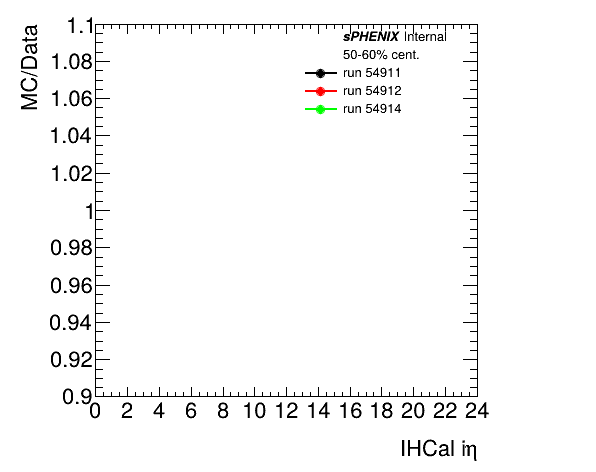

In [274]:
for i in range(len(emcal_ratio)):
    canvas = TCanvas("canvas","",600,500)
    canvas.SetRightMargin(0.2)
    leg = ROOT.TLegend(.5,.84,.8,.94)
    leg.SetTextSize(0.03)
    leg.SetFillStyle(0)
    leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
    leg.AddEntry("",f"{cent}% cent.","")
    leg.AddEntry(emcal_ratio[i],leg_labels[i],"")
    emcal_ratio[i].GetZaxis().SetRangeUser(0.9,1.1)
    emcal_ratio[i].SetXTitle("EMCal i#eta")
    emcal_ratio[i].SetYTitle("EMCal i#phi")
    emcal_ratio[i].Draw("colz")
    canvas.Update()
    palette = emcal_ratio[i].GetListOfFunctions().FindObject("palette")
    palette.SetX1NDC(0.82)
    palette.SetX2NDC(0.9)
    leg.Draw()
    canvas.Update()
    canvas.Draw()
    canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_ET_ratio_'+leg_labels[i]+'_'+cent+'.png')

In [275]:
canvas = TCanvas("canvas","",600,500)
canvas.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.75,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(emcal_projx)):
    leg.AddEntry(emcal_projx[i],leg_labels[i],"pl")
    emcal_projx[i].SetLineColor(i+1)
    emcal_projx[i].SetMarkerColor(i+1)
    if i == 0:
        emcal_projx[i].GetYaxis().SetRangeUser(0.9,1.1)
        emcal_projx[i].SetXTitle("EMCal i#eta")
        emcal_projx[i].SetYTitle("MC/Data")
        emcal_projx[i].Draw()
    else:
        emcal_projx[i].Draw('same')
leg.Draw()
canvas.Update()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_ieta_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/emcal_ieta_ratio_50-60.png has been created


In [277]:
canvas = TCanvas("canvas","",600,500)
canvas.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.75,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(emcal_projy)):
    leg.AddEntry(emcal_projx[i],leg_labels[i],"pl")
    emcal_projy[i].SetLineColor(i+1)
    emcal_projy[i].SetMarkerColor(i+1)
    if i == 0:
        emcal_projy[i].GetYaxis().SetRangeUser(0.9,1.1)
        emcal_projy[i].SetXTitle("EMCal i#phi")
        emcal_projy[i].SetYTitle("MC/Data")
        emcal_projy[i].Draw()
    else:
        emcal_projy[i].Draw('same')
leg.Draw()
canvas.Update()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_iphi_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/emcal_iphi_ratio_50-60.png has been created


In [69]:
for i in range(len(ihcal_ratio)):
    canvas = TCanvas("canvas","",600,500)
    canvas.SetRightMargin(0.2)
    leg = ROOT.TLegend(.5,.84,.8,.94)
    leg.SetTextSize(0.03)
    leg.SetFillStyle(0)
    leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
    leg.AddEntry("",f"{cent}% cent.","")
    leg.AddEntry(ihcal_ratio[i],leg_labels[i],"")
    ihcal_ratio[i].GetZaxis().SetRangeUser(0.5,1.5)
    ihcal_ratio[i].SetXTitle("IHCal i#eta")
    ihcal_ratio[i].SetYTitle("IHCal i#phi")
    ihcal_ratio[i].Draw("colz")
    canvas.Update()
    palette = ihcal_ratio[i].GetListOfFunctions().FindObject("palette")
    palette.SetX1NDC(0.82)
    palette.SetX2NDC(0.9)
    leg.Draw()
    canvas.Update()
    canvas.Draw()
    canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ihcal_ET_ratio_'+leg_labels[i]+'_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/results_1_15/QA_plots/ihcal_ET_ratio_Hijing_0-5.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/results_1_15/QA_plots/ihcal_ET_ratio_Run2024 54912_0-5.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/results_1_15/QA_plots/ihcal_ET_ratio_EPOS_0-5.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/results_1_15/QA_plots/ihcal_ET_ratio_Hijing w radius scaling_0-5.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/re

In [279]:
canvas = TCanvas("canvas","",600,500)
canvas.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.75,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(ihcal_projx)):
    leg.AddEntry(ihcal_projx[i],leg_labels[i],"pl")
    ihcal_projx[i].SetLineColor(i+1)
    ihcal_projx[i].SetMarkerColor(i+1)
    if i == 0:
        ihcal_projx[i].GetYaxis().SetRangeUser(0.9,1.1)
        ihcal_projx[i].SetXTitle("IHCal i#eta")
        ihcal_projx[i].SetYTitle("MC/Data")
        ihcal_projx[i].Draw()
    else:
        ihcal_projx[i].Draw('same')
leg.Draw()
canvas.Update()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ihcal_ieta_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ihcal_ieta_ratio_50-60.png has been created


In [71]:
canvas = TCanvas("canvas","",600,500)
canvas.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.75,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(ihcal_projy)):
    leg.AddEntry(ihcal_projy[i],leg_labels[i],"pl")
    ihcal_projy[i].SetLineColor(i+1)
    ihcal_projy[i].SetMarkerColor(i+1)
    if i == 0:
        ihcal_projy[i].GetYaxis().SetRangeUser(0.5,1.5)
        ihcal_projy[i].SetXTitle("IHCal i#phi")
        ihcal_projy[i].SetYTitle("MC/Data")
        ihcal_projy[i].Draw()
    else:
        ihcal_projy[i].Draw('same')
leg.Draw()
canvas.Update()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ihcal_iphi_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/results_1_15/QA_plots/ihcal_iphi_ratio_0-5.png has been created


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ohcal_ET_ratio_run 54911_50-60.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ohcal_ET_ratio_run 54912_50-60.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ohcal_ET_ratio_run 54914_50-60.png has been created


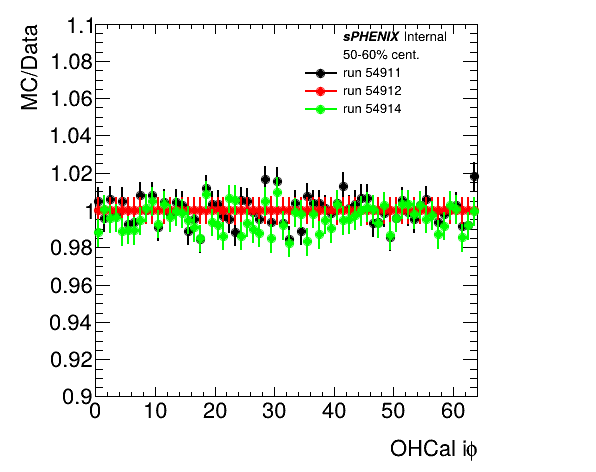

In [280]:
for i in range(len(ohcal_ratio)):
    canvas = TCanvas("canvas","",600,500)
    canvas.SetRightMargin(0.2)
    leg = ROOT.TLegend(.5,.84,.8,.94)
    leg.SetTextSize(0.03)
    leg.SetFillStyle(0)
    leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
    leg.AddEntry("",f"{cent}% cent.","")
    leg.AddEntry(ohcal_ratio[i],leg_labels[i],"")
    ohcal_ratio[i].GetZaxis().SetRangeUser(0.9,1.1)
    ohcal_ratio[i].SetXTitle("OHCal i#eta")
    ohcal_ratio[i].SetYTitle("OHCal i#phi")
    ohcal_ratio[i].Draw("colz")
    canvas.Update()
    palette = ohcal_ratio[i].GetListOfFunctions().FindObject("palette")
    palette.SetX1NDC(0.82)
    palette.SetX2NDC(0.9)
    leg.Draw()
    canvas.Update()
    canvas.Draw()
    canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ohcal_ET_ratio_'+leg_labels[i]+'_'+cent+'.png')

In [281]:
canvas = TCanvas("canvas","",600,500)
canvas.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.75,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(ohcal_projx)):
    leg.AddEntry(ohcal_projx[i],leg_labels[i],"pl")
    ohcal_projx[i].SetLineColor(i+1)
    ohcal_projx[i].SetMarkerColor(i+1)
    if i == 0:
        ohcal_projx[i].GetYaxis().SetRangeUser(0.9,1.1)
        ohcal_projx[i].SetXTitle("OHCal i#eta")
        ohcal_projx[i].SetYTitle("MC/Data")
        ohcal_projx[i].Draw()
    else:
        ohcal_projx[i].Draw('same')
leg.Draw()
canvas.Update()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ohcal_ieta_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ohcal_ieta_ratio_50-60.png has been created


In [282]:
canvas = TCanvas("canvas","",600,500)
canvas.SetRightMargin(0.2)
leg = ROOT.TLegend(.5,.75,.8,.94)
leg.SetTextSize(0.03)
leg.SetFillStyle(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(ohcal_projy)):
    leg.AddEntry(ohcal_projy[i],leg_labels[i],"pl")
    ohcal_projy[i].SetLineColor(i+1)
    ohcal_projy[i].SetMarkerColor(i+1)
    if i == 0:
        ohcal_projy[i].GetYaxis().SetRangeUser(0.9,1.1)
        ohcal_projy[i].SetXTitle("OHCal i#phi")
        ohcal_projy[i].SetYTitle("MC/Data")
        ohcal_projy[i].Draw()
    else:
        ohcal_projy[i].Draw('same')
leg.Draw()
canvas.Update()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ohcal_iphi_ratio_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ohcal_iphi_ratio_50-60.png has been created


## Calorimeter total energy: h_event_energy, h_event_hcal_energy, h_event_emcal_energy, h_event_ihcal_energy, h_event_ohcal_energy 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/event_total_energy_50-60.png has been created


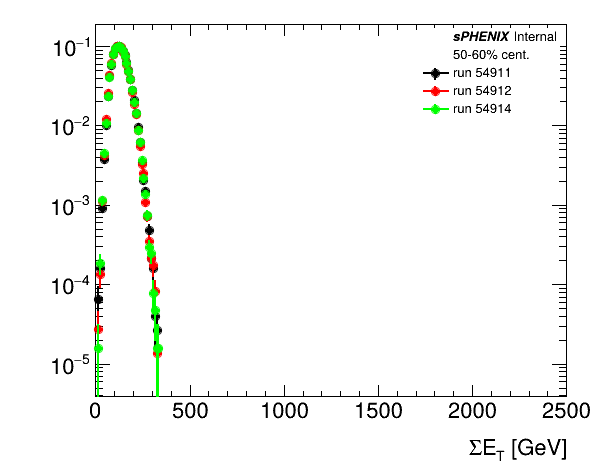

In [283]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_event_energy)):
    leg.AddEntry(h_event_energy[i],leg_labels[i],"lep")
    h_event_energy[i].SetLineColor(i+1)
    h_event_energy[i].SetMarkerColor(i+1)
    h_event_energy[i].SetStats(0)
    if i == 0:
        h_event_energy[i].SetXTitle("#SigmaE_{T} [GeV]")
        h_event_energy[i].GetXaxis().SetRangeUser(0,2500)
        h_event_energy[i].Draw()
    else:
        h_event_energy[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/event_total_energy_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/event_hcal_total_energy_50-60.png has been created


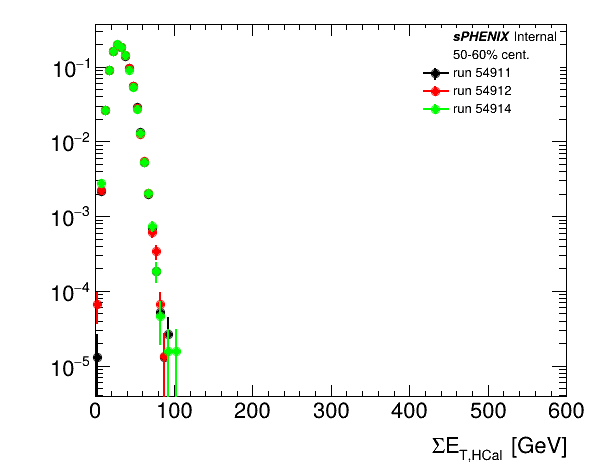

In [284]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_event_hcal_energy)):
    leg.AddEntry(h_event_hcal_energy[i],leg_labels[i],"lep")
    h_event_hcal_energy[i].SetLineColor(i+1)
    h_event_hcal_energy[i].SetMarkerColor(i+1)
    h_event_hcal_energy[i].SetStats(0)
    if i == 0:
        h_event_hcal_energy[i].SetXTitle("#SigmaE_{T,HCal} [GeV]")
        h_event_hcal_energy[i].GetXaxis().SetRangeUser(0,600)
        h_event_hcal_energy[i].Draw()
    else:
        h_event_hcal_energy[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/event_hcal_total_energy_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/event_emcal_total_energy_50-60.png has been created


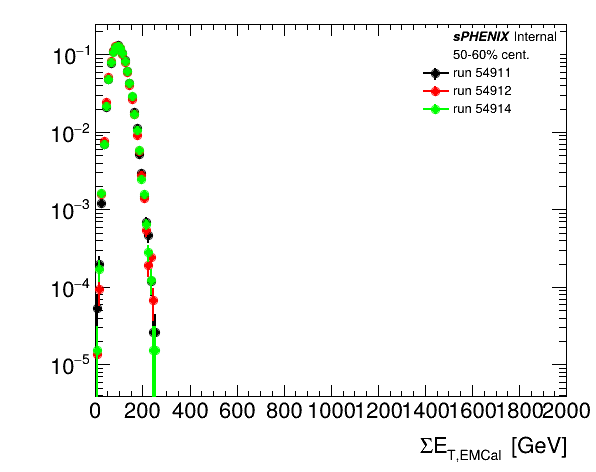

In [285]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_event_emcal_energy)):
    leg.AddEntry(h_event_emcal_energy[i],leg_labels[i],"lep")
    h_event_emcal_energy[i].SetLineColor(i+1)
    h_event_emcal_energy[i].SetMarkerColor(i+1)
    h_event_emcal_energy[i].SetStats(0)
    if i == 0:
        h_event_emcal_energy[i].SetXTitle("#SigmaE_{T,EMCal} [GeV]")
        h_event_emcal_energy[i].GetXaxis().SetRangeUser(0,2000)
        h_event_emcal_energy[i].Draw()
    else:
        h_event_emcal_energy[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/event_emcal_total_energy_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/event_ohcal_total_energy_50-60.png has been created


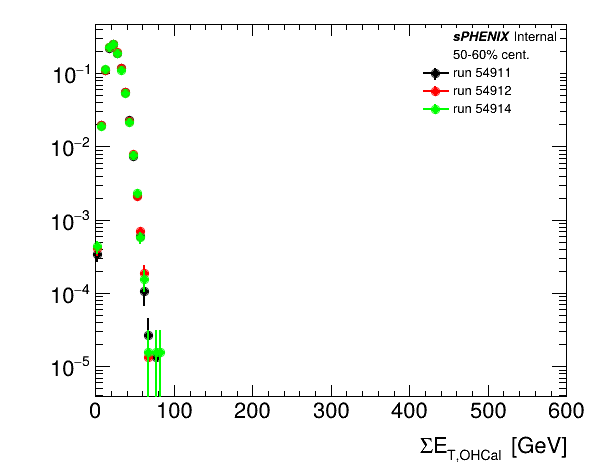

In [286]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_event_ohcal_energy)):
    leg.AddEntry(h_event_ohcal_energy[i],leg_labels[i],"lep")
    h_event_ohcal_energy[i].SetLineColor(i+1)
    h_event_ohcal_energy[i].SetMarkerColor(i+1)
    h_event_ohcal_energy[i].SetStats(0)
    if i == 0:
        h_event_ohcal_energy[i].SetXTitle("#SigmaE_{T,OHCal} [GeV]")
        h_event_ohcal_energy[i].GetXaxis().SetRangeUser(0,600)
        h_event_ohcal_energy[i].Draw()
    else:
        h_event_ohcal_energy[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/event_ohcal_total_energy_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/event_ihcal_total_energy_50-60.png has been created


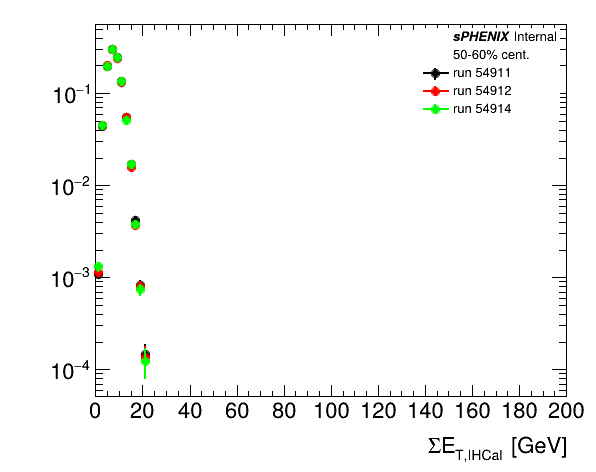

In [287]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_event_ihcal_energy)):
    leg.AddEntry(h_event_ihcal_energy[i],leg_labels[i],"lep")
    h_event_ihcal_energy[i].SetLineColor(i+1)
    h_event_ihcal_energy[i].SetMarkerColor(i+1)
    h_event_ihcal_energy[i].SetStats(0)
    if i == 0:
        h_event_ihcal_energy[i].SetXTitle("#SigmaE_{T,IHCal} [GeV]")
        h_event_ihcal_energy[i].GetXaxis().SetRangeUser(0,200)
        h_event_ihcal_energy[i].Draw()
    else:
        h_event_ihcal_energy[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/event_ihcal_total_energy_'+cent+'.png')

## Calorimeter tower spectra: h_emcal, h_ihcal, h_ohcal

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/emcal_energy_spectra_50-60.png has been created


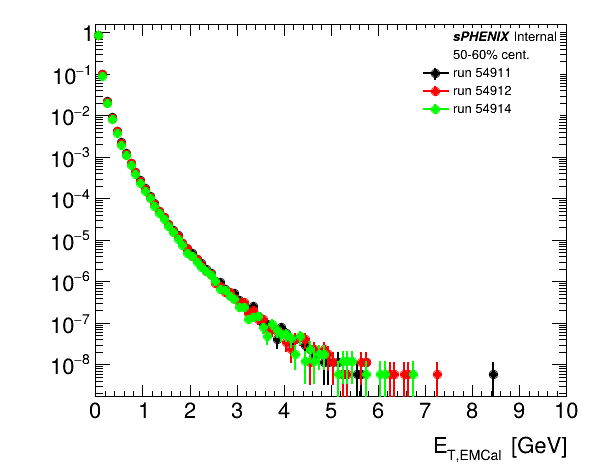

In [288]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_emcal)):
    leg.AddEntry(h_emcal[i],leg_labels[i],"lep")
    h_emcal[i].SetLineColor(i+1)
    h_emcal[i].SetMarkerColor(i+1)
    h_emcal[i].SetStats(0)
    if i == 0:
        h_emcal[i].SetXTitle("E_{T,EMCal} [GeV]")
        #h_emcal[i].GetXaxis().SetRangeUser(0,200)
        h_emcal[i].Draw()
    else:
        h_emcal[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_energy_spectra_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ihcal_energy_spectra_50-60.png has been created


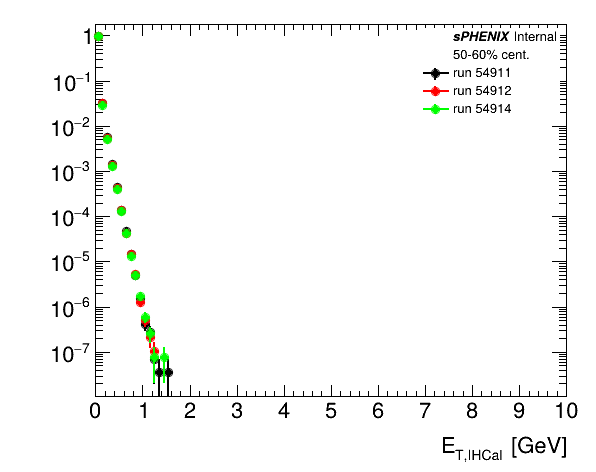

In [289]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_ihcal)):
    leg.AddEntry(h_ihcal[i],leg_labels[i],"lep")
    h_ihcal[i].SetLineColor(i+1)
    h_ihcal[i].SetMarkerColor(i+1)
    h_ihcal[i].SetStats(0)
    if i == 0:
        h_ihcal[i].SetXTitle("E_{T,IHCal} [GeV]")
        #h_emcal[i].GetXaxis().SetRangeUser(0,200)
        h_ihcal[i].Draw()
    else:
        h_ihcal[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ihcal_energy_spectra_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/run_by_run_QA_plots/ohcal_energy_spectra_50-60.png has been created


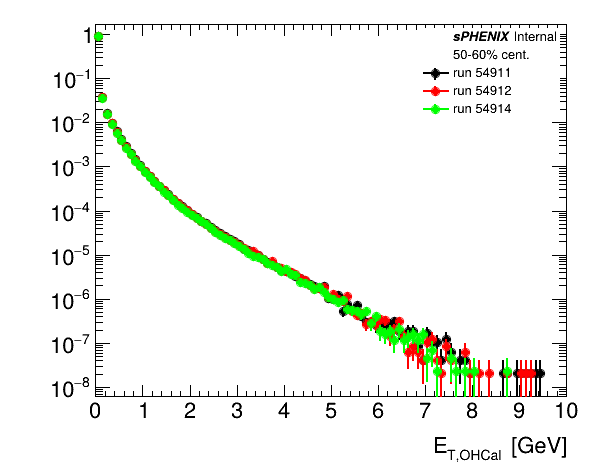

In [290]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.7,.75,.94,.94)
leg.SetTextSize(0.03)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
for i in range(len(h_ohcal)):
    leg.AddEntry(h_ohcal[i],leg_labels[i],"lep")
    h_ohcal[i].SetLineColor(i+1)
    h_ohcal[i].SetMarkerColor(i+1)
    h_ohcal[i].SetStats(0)
    if i == 0:
        h_ohcal[i].SetXTitle("E_{T,OHCal} [GeV]")
        #h_emcal[i].GetXaxis().SetRangeUser(0,200)
        h_ohcal[i].Draw()
    else:
        h_ohcal[i].Draw("same")
leg.Draw()
canvas.SetLogy(1)
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ohcal_energy_spectra_'+cent+'.png')